📂 Sube uno o varios archivos .wav desde tu computador:


Saving audio-club-edyn-343275.wav to audio-club-edyn-343275.wav
Saving intensity-by-audio-club-343637.wav to intensity-by-audio-club-343637.wav


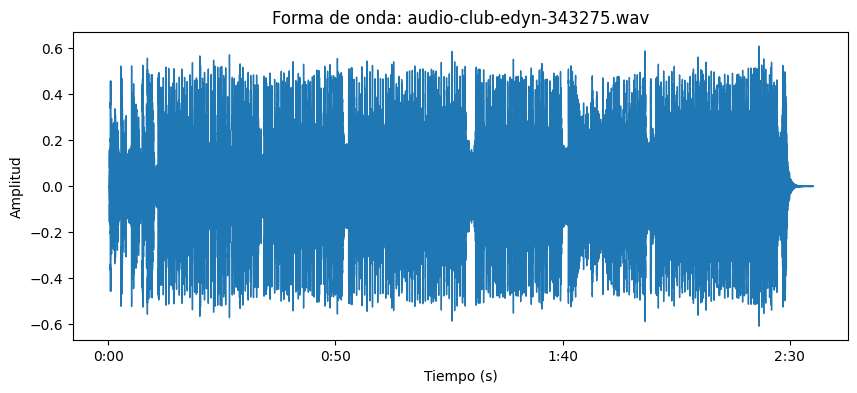

✅ Analizado: audio-club-edyn-343275.wav | Duración: 155.04s | Energía: 0.014185000211000443


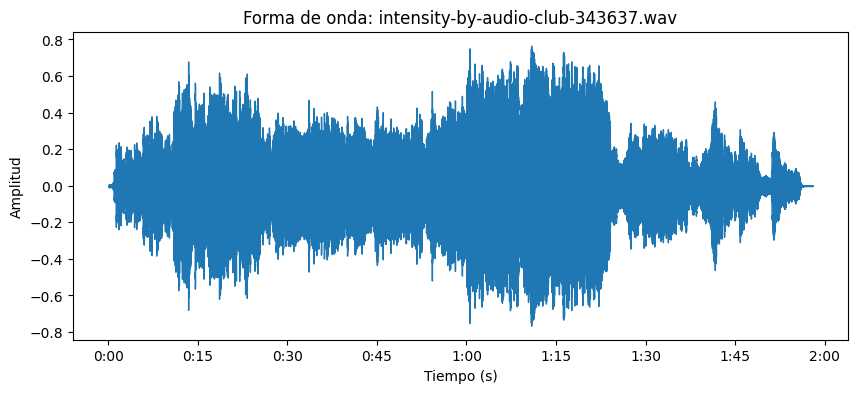

✅ Analizado: intensity-by-audio-club-343637.wav | Duración: 117.98s | Energía: 0.0165570005774498


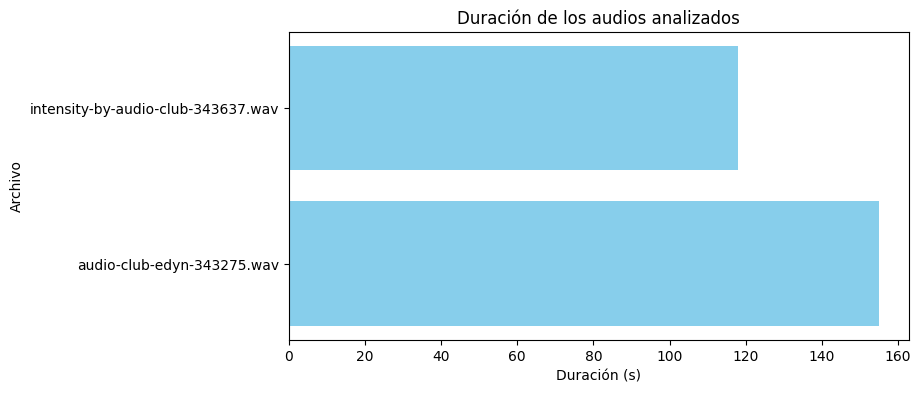


📊 Resultados finales:
{'archivo': 'audio-club-edyn-343275.wav', 'duracion_seg': 155.04, 'energia_promedio': np.float32(0.014185)}
{'archivo': 'intensity-by-audio-club-343637.wav', 'duracion_seg': 117.98, 'energia_promedio': np.float32(0.016557)}


In [1]:
# PUNTO 1

import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
from abc import ABC, abstractmethod
from google.colab import files
import tempfile

#Clase base abstracta
class AudioBase(ABC):
    @abstractmethod
    def load_audio(self, path):
        pass

    @abstractmethod
    def get_duration(self):
        pass

    @abstractmethod
    def plot_waveform(self):
        pass


# Clase hija AudioAnalyzer
class AudioAnalyzer(AudioBase):
    def __init__(self, path):
        self.path = path
        self.data = None
        self.sr = None
        self.duration = 0
        self.energy = 0

    def load_audio(self, path=None):
        if path:
            self.path = path
        try:
            self.data, self.sr = librosa.load(self.path, sr=None)
            self.duration = librosa.get_duration(y=self.data, sr=self.sr)
            self.energy = np.mean(self.data ** 2)
        except Exception as e:
            print(f" Error al cargar {self.path}: {e}")
        return self.data, self.sr

    def get_duration(self):
        return self.duration

    def plot_waveform(self):
        if self.data is None:
            print(" No hay datos cargados.")
            return
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(self.data, sr=self.sr)
        plt.title(f"Forma de onda: {os.path.basename(self.path)}")
        plt.xlabel("Tiempo (s)")
        plt.ylabel("Amplitud")
        plt.show()


# Clase recursiva BatchAudioAnalyzer
class BatchAudioAnalyzer:
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.results = []

    def analyze_folder(self, folder=None):
        if folder is None:
            folder = self.folder_path

        for file in os.listdir(folder):
            path = os.path.join(folder, file)
            if os.path.isdir(path):
                self.analyze_folder(path)  # recursividad
            elif file.lower().endswith(".wav"):
                analyzer = AudioAnalyzer(path)
                analyzer.load_audio()
                analyzer.plot_waveform()  # Mostrar forma de onda
                info = {
                    "archivo": file,
                    "duracion_seg": round(analyzer.get_duration(), 2),
                    "energia_promedio": round(analyzer.energy, 6)
                }
                self.results.append(info)
                print(f" Analizado: {file} | Duración: {info['duracion_seg']}s | Energía: {info['energia_promedio']}")
        return self.results

    def plot_durations(self):
        if not self.results:
            print(" No hay resultados para graficar.")
            return
        nombres = [r["archivo"] for r in self.results]
        duraciones = [r["duracion_seg"] for r in self.results]
        plt.figure(figsize=(8, 4))
        plt.barh(nombres, duraciones, color='skyblue')
        plt.xlabel("Duración (s)")
        plt.ylabel("Archivo")
        plt.title("Duración de los audios analizados")
        plt.show()


# Subir archivos desde el PC
print("Sube uno o varios archivos .wav desde tu computador:")
uploaded = files.upload()

# Crear carpeta temporal y guardar los archivos
temp_dir = tempfile.mkdtemp()
for fname, file in uploaded.items():
    with open(os.path.join(temp_dir, fname), 'wb') as f:
        f.write(file)

# Analizar los audios subidos
batch = BatchAudioAnalyzer(temp_dir)
resultados = batch.analyze_folder()
batch.plot_durations()

print("\n📊 Resultados finales:")
for r in resultados:
    print(r)


Sube una o varias imágenes (.jpg o .png) desde tu computador:


Saving swans-7736415_640.jpg to swans-7736415_640.jpg
Saving shutterstock-2364347943_7b6b9957_240618122047_800x800.jpg to shutterstock-2364347943_7b6b9957_240618122047_800x800.jpg
 Procesando: swans-7736415_640.jpg


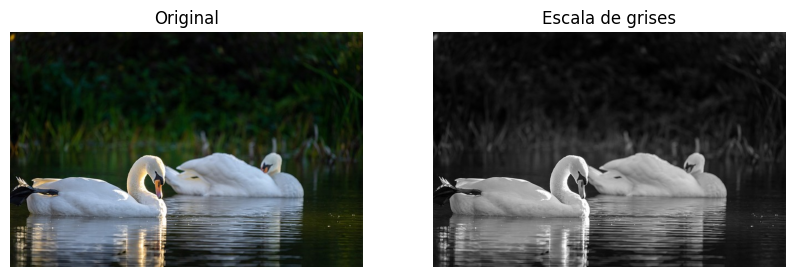

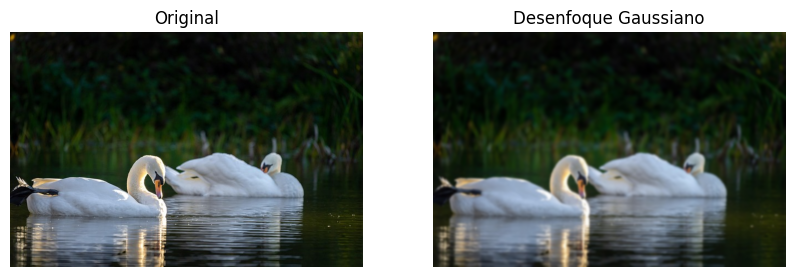

 Guardadas: resultados/gray_swans-7736415_640.jpg y resultados/blur_swans-7736415_640.jpg
 Procesando: shutterstock-2364347943_7b6b9957_240618122047_800x800.jpg


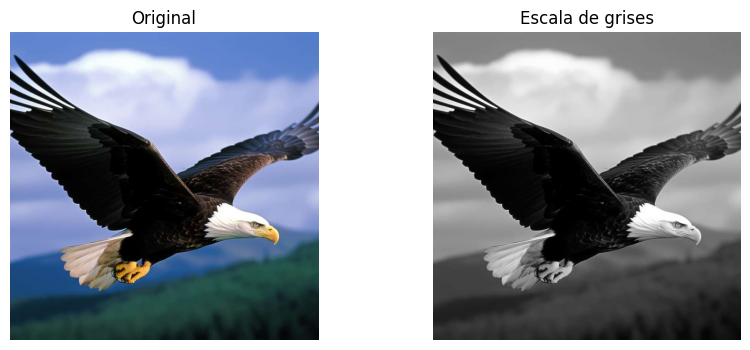

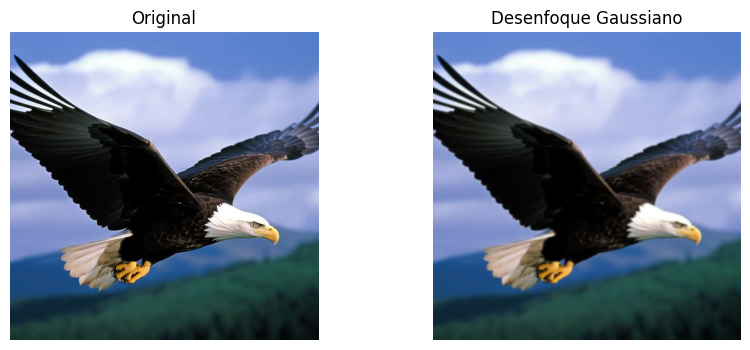

 Guardadas: resultados/gray_shutterstock-2364347943_7b6b9957_240618122047_800x800.jpg y resultados/blur_shutterstock-2364347943_7b6b9957_240618122047_800x800.jpg

 ¡Proceso completo! Las imágenes procesadas están en la carpeta 'resultados'


In [4]:
# PUNTO 2

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
from google.colab import files
import tempfile

# Clase base abstracta
class ImageProcessor(ABC):
    @abstractmethod
    def load_image(self, path):
        pass

    @abstractmethod
    def apply_filter(self):
        pass

    @abstractmethod
    def show_image(self):
        pass


# Clase hija GrayScaleFilter
class GrayScaleFilter(ImageProcessor):
    def __init__(self, path):
        self.path = path
        self.image = None
        self.result = None

    def load_image(self, path=None):
        if path:
            self.path = path
        self.image = cv2.imread(self.path)
        if self.image is None:
            print(f"❌ Error al cargar {self.path}")
        return self.image

    def apply_filter(self):
        self.result = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        return self.result

    def show_image(self):
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        plt.imshow(cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB))
        plt.title("Original")
        plt.axis("off")

        plt.subplot(1,2,2)
        plt.imshow(self.result, cmap='gray')
        plt.title("Escala de grises")
        plt.axis("off")
        plt.show()


# Clase hija: BlurFilter
class BlurFilter(ImageProcessor):
    def __init__(self, path):
        self.path = path
        self.image = None
        self.result = None

    def load_image(self, path=None):
        if path:
            self.path = path
        self.image = cv2.imread(self.path)
        if self.image is None:
            print(f"❌ Error al cargar {self.path}")
        return self.image

    def apply_filter(self):
        self.result = cv2.GaussianBlur(self.image, (9,9), 0)
        return self.result

    def show_image(self):
        plt.figure(figsize=(10,4))
        plt.subplot(1,2,1)
        plt.imshow(cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB))
        plt.title("Original")
        plt.axis("off")

        plt.subplot(1,2,2)
        plt.imshow(cv2.cvtColor(self.result, cv2.COLOR_BGR2RGB))
        plt.title("Desenfoque Gaussiano")
        plt.axis("off")
        plt.show()


# Clase recursiva
class BatchImageProcessor:
    def __init__(self, folder_path, output_folder="resultados"):
        self.folder_path = folder_path
        self.output_folder = output_folder
        os.makedirs(self.output_folder, exist_ok=True)

    def process_folder(self, folder=None):
        if folder is None:
            folder = self.folder_path

        for file in os.listdir(folder):
            path = os.path.join(folder, file)
            if os.path.isdir(path):
                self.process_folder(path)  # recursividad
            elif file.lower().endswith(('.jpg', '.png')):
                print(f" Procesando: {file}")

                # Escala de grises
                gray_filter = GrayScaleFilter(path)
                gray_filter.load_image()
                gray_img = gray_filter.apply_filter()
                gray_filter.show_image()
                gray_output = os.path.join(self.output_folder, f"gray_{file}")
                cv2.imwrite(gray_output, gray_img)

                # Desenfoque
                blur_filter = BlurFilter(path)
                blur_filter.load_image()
                blur_img = blur_filter.apply_filter()
                blur_filter.show_image()
                blur_output = os.path.join(self.output_folder, f"blur_{file}")
                cv2.imwrite(blur_output, blur_img)

                print(f" Guardadas: {gray_output} y {blur_output}")


# Subir imágenes desde el PC
print("Sube una o varias imágenes (.jpg o .png) desde tu computador:")
uploaded = files.upload()

# carpeta para archivos subidos
temp_dir = tempfile.mkdtemp()
for fname, file in uploaded.items():
    with open(os.path.join(temp_dir, fname), 'wb') as f:
        f.write(file)

# Procesar imágenes subidas
processor = BatchImageProcessor(temp_dir)
processor.process_folder()

print("\n ¡Proceso completo! Las imágenes procesadas están en la carpeta 'resultados'")
